**Import Libraries**

In [29]:
import os
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import matplotlib.pyplot as plt

**Initialize Directories and Load Resources**

In [30]:
# Directories
WORKING_DIR = r'C:\Users\victus\OneDrive\Desktop\AI'

# Load trained model
model = load_model(os.path.join(WORKING_DIR, 'best_model.keras'))

# Load tokenizer
with open(os.path.join(WORKING_DIR, 'tokenizer.pkl'), 'rb') as f:
    tokenizer = pickle.load(f)

# Hard-code the maximum caption length used during training
max_length = 37  # Adjust based on your training
print(f"Maximum caption length: {max_length}")

Maximum caption length: 37


**Initialize Feature Extractor**

In [31]:
# Load VGG16 and configure it to extract features from the 'fc2' layer
base_model = VGG16(weights='imagenet')
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

def extract_features(image_path, feature_extractor):
    """Extract features from an image using the VGG16 model."""
    # Load and preprocess the image
    image = load_img(image_path, target_size=(224, 224))  # Resize to VGG16 input size
    image = img_to_array(image)  # Convert to NumPy array
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = preprocess_input(image)  # Preprocess for VGG16
    
    # Extract features
    features = feature_extractor.predict(image, verbose=0)
    return features

**Helper Functions**

In [32]:
def idx_to_word(integer, tokenizer):
    """Convert an integer index back to a word."""
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

def predict_caption(model, image_feature, tokenizer, max_length):
    """Generate a caption for a given image feature."""
    in_text = 'startseq'
    for _ in range(max_length):
        # Encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        
        # Predict the next word
        yhat = model.predict([image_feature, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)
        
        # Stop if word is None or 'endseq' is reached
        if word is None or word == 'endseq':
            break
        
        # Append the word to the input text
        in_text += ' ' + word
    
    return in_text.replace('startseq', '').strip()

**Generate Caption Function**

In [33]:
def generate_caption(image_path):
    """Load an image, extract features, and generate its caption."""
    # Extract features from the input image
    features = extract_features(image_path, feature_extractor)
    
    # Generate predicted caption
    caption = predict_caption(model, features, tokenizer, max_length)
    
    # Display the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
    
    print('--------------------Predicted Caption--------------------')
    print(caption)

**Test Example**

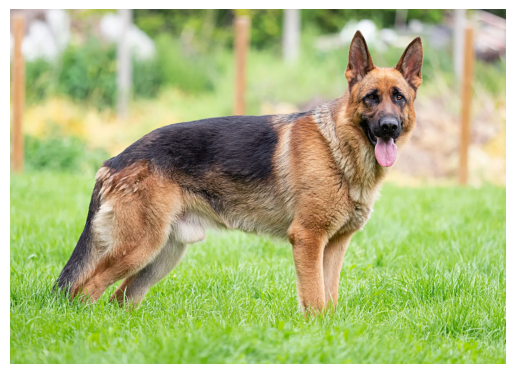

--------------------Predicted Caption--------------------
german shepherd runs through the grass


In [34]:
# Path to a random image
image_path = r'C:\Users\victus\Downloads\nigga.webp'

# Generate caption for the input image
generate_caption(image_path)
